Columns with null values: ['Age', 'Cabin', 'Embarked']
Missing values after filling: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


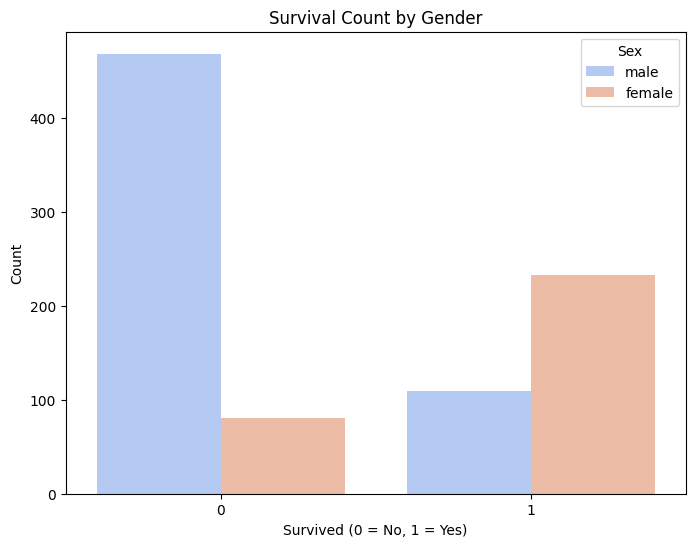

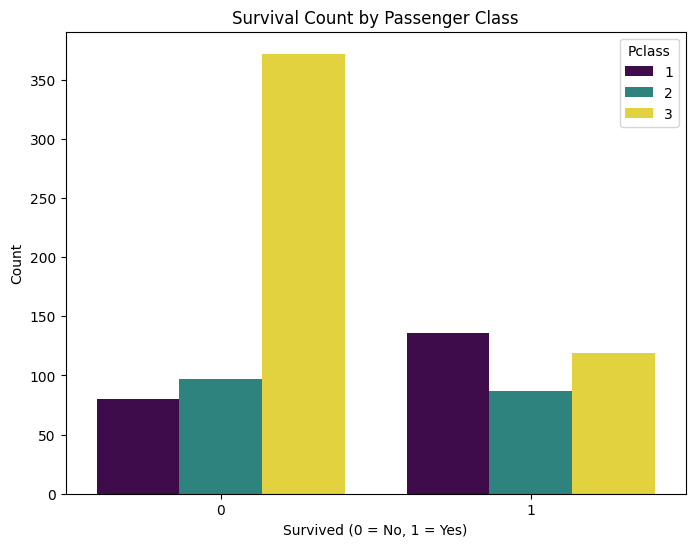

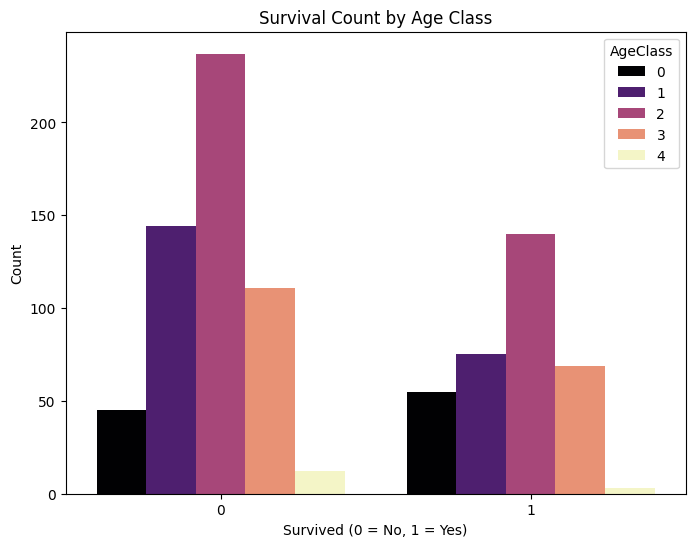

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")
#Find features with Null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns.tolist())
#Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Missing values after filling:", df.isnull().sum())
#Plot Survived vs Dead with Male and Female distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
#Plot Survived vs Dead with Passenger Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
#Create AgeClass column
def categorize_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4
df['AgeClass'] = df['Age'].apply(categorize_age)
#Drop Age column
df.drop(columns=['Age'], inplace=True)
#Plot Survived vs Dead with AgeClass distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='AgeClass', data=df, palette='magma')
plt.title("Survival Count by Age Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()